# Question 1 - Cluster exploration

## Q 1.1






In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [552]:
data = pd.read_csv("data.csv", index_col=0)

print(data.shape)
data.head(10)

(801, 20531)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
sample_5,0.0,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.0
sample_6,0.0,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.0
sample_7,0.0,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.0
sample_8,0.0,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.0
sample_9,0.0,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.0


### Task 1
#### As in every good data analysis, you should start to explore the data. There is a bunch of things to look at:

* Are there missing values? --> NO
* Compute the means and variances of the features (visualise in a histogram or with a kernel density estimate). Do they vary widely?
* Are there constant features?


In [553]:
# Sum of cells missing values
print(f'Nr of cells with missing values: {sum(data.isna().sum())}')

Nr of cells with missing values: 0


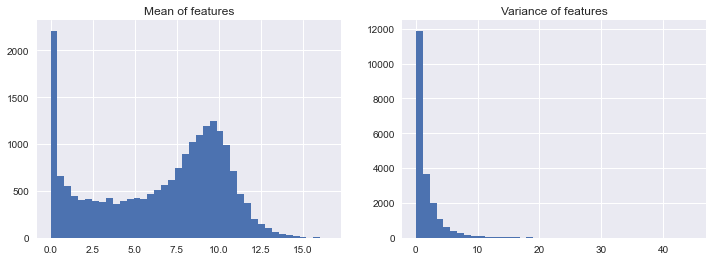

In [554]:
# Get mean and standard deviation for features
mean = data.mean()
var = data.var()    

# Plot results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax1.hist(mean, bins=40)
ax2.hist(var, bins=40)
ax1.set_title('Mean of features')
ax2.set_title('Variance of features')
plt.show()

In [555]:
# Drop constant columns  
data.loc[:, (data != data.iloc[0]).any()].shape

(801, 20264)

Since the number of features decreased (from 20,531 to 20,264) the dataset contained 267 constant features

### Task 2
* Perform variance filtering and reduce the number of features to about 5000.
* Check the means and variances for each feature again. Is there a need to center and standardize the data?

In [556]:
from sklearn.feature_selection import VarianceThreshold

# List of variance thresholds
var_thresholds = np.linspace(1, 3, 20)

# Explore different variance thresholds to find optimal --> ≈ 5000 features
for threshold in var_thresholds:
    var_filter = VarianceThreshold(threshold=threshold)

    result = var_filter.fit_transform(data)
    num_features = result.shape[1]
    
    print(f'Variance threshold: {threshold:2f} \nNumber of features left: {num_features}\n')

Variance threshold: 1.000000 
Number of features left: 9204

Variance threshold: 1.105263 
Number of features left: 8706

Variance threshold: 1.210526 
Number of features left: 8272

Variance threshold: 1.315789 
Number of features left: 7821

Variance threshold: 1.421053 
Number of features left: 7433

Variance threshold: 1.526316 
Number of features left: 7053

Variance threshold: 1.631579 
Number of features left: 6697

Variance threshold: 1.736842 
Number of features left: 6369

Variance threshold: 1.842105 
Number of features left: 6068

Variance threshold: 1.947368 
Number of features left: 5724

Variance threshold: 2.052632 
Number of features left: 5426

Variance threshold: 2.157895 
Number of features left: 5175

Variance threshold: 2.263158 
Number of features left: 4927

Variance threshold: 2.368421 
Number of features left: 4686

Variance threshold: 2.473684 
Number of features left: 4475

Variance threshold: 2.578947 
Number of features left: 4262

Variance threshold: 2.68

In [557]:
# Filter data with optimal threshold (≈5000 features kept)
var_filter = VarianceThreshold(2.2)
data = var_filter.fit_transform(data)

print(f'Filtered dataset nr of features: {data.shape[1]}')

Filtered dataset nr of features: 5071


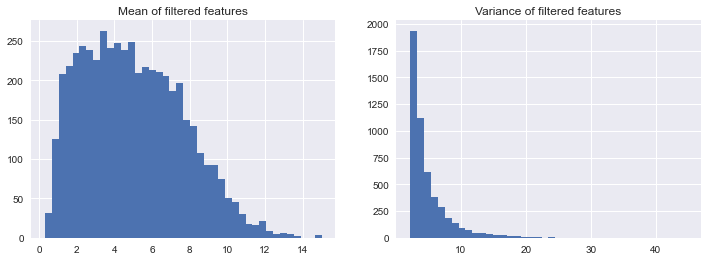

In [558]:
# Get mean and standard deviation for filtered features
mean = pd.DataFrame(data).mean()
var = pd.DataFrame(data).var()    

# Plot results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax1.hist(mean, bins=40)
ax2.hist(var, bins=40)
ax1.set_title('Mean of filtered features')
ax2.set_title('Variance of filtered features')
plt.show()

In [575]:
from sklearn.preprocessing import StandardScaler

# Standardize data 
scaler = StandardScaler()
data = scaler.fit_transform(data)

### Task 3

* Perform a Principal Component Analysis on the reduced dataset and look at some pair-plots between the first few principal components.
* Are any patterns visible?
* Also look at the eigenvalues of the principal components (scree plot)
* Is there a potential to reduce the dimension of the dataset even more?
If so, perform a dimension reduction and only work with the selected principal components. If not, work with the original dataset after variance filtering.


In [560]:
from sklearn.decomposition import PCA

# Get 10 first principal components 
pca = PCA(n_components=10)
principal_components = pca.fit_transform(data)

# Store principal components in dataframe for visualization
principal_components = pd.DataFrame(data = principal_components)

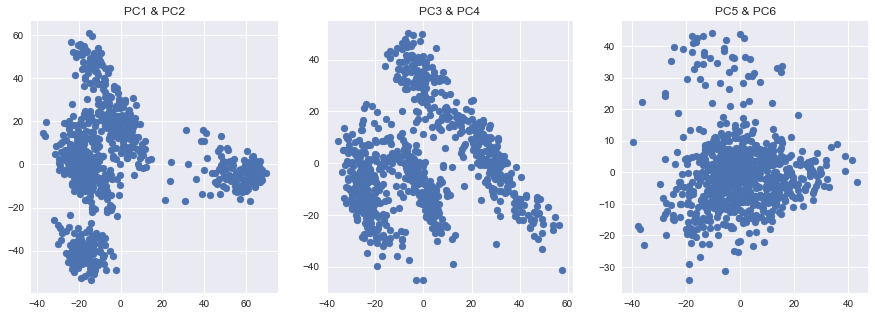

In [561]:
# Plot three first pairs of principal components
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax1.scatter(principal_components.iloc[:, 0], principal_components.iloc[:, 1])
ax2.scatter(principal_components.iloc[:, 2], principal_components.iloc[:, 3])
ax3.scatter(principal_components.iloc[:, 4], principal_components.iloc[:, 5])
ax1.set_title('PC1 & PC2')
ax2.set_title('PC3 & PC4')
ax3.set_title('PC5 & PC6')
plt.show()

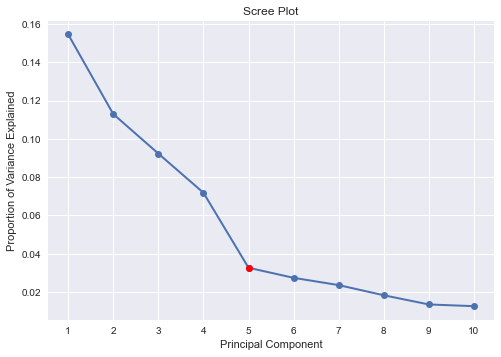

In [562]:
# Plot eigenvalues of principal components
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, linewidth=2, marker='o')
plt.plot(pc_values[4], pca.explained_variance_ratio_[4], '-ro')
plt.xticks(np.linspace(1,10,10))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [563]:
# Final feature dataframe containing five first principal components
principal_components.drop(principal_components.columns[5:], inplace=True, axis=1)
principal_components.columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']
principal_components.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-20.536573,-39.605085,27.026740,7.519038,-1.253594
1,-1.703527,35.554901,-2.252613,19.662346,-21.237761
2,-26.944853,2.995044,30.175370,-31.260508,-39.540452
3,-29.924360,-27.954171,28.644093,-10.136862,-18.015003
4,-27.296967,-4.393025,-21.940561,-19.092111,2.463744


## Q 1.2

### Task 4
* Use at least two different clustering algorithms to cluster the data for a range of different cluster counts: k-means, GMM, DBSCAN
    * Start with 2 and judge from the PCA pair plots what could be a good upper bound, then go at least 2 or 3 clusters further.
    * Caution: Remember that some algorithms, such as k-means or GMM can have varying results depending on how they are initialised, so it is a good idea to re-run     these algorithms a few times and to average over the outcome (see next bullet point).

* Use internal clustering indices to measure how coherent the clustering was for each choice of cluster count. Use at least three different indices. (elbow, silhouette, davis)
    * Look at plots of the clustering indices. Is there a clear indication what a good cluster count could be?      Discuss and argue based on your results!
    * There may not be a clear answer, it is possible that two or more cluster counts are good potential            choices.

* Visualise your clustering result, e.g. look at scatter plots of pairs of principal components and use the found cluster labels to color the data points.
    * Do the found clusters look reasonable? If not, you might want to reconsider your choice of clusters.

In [564]:
# K-means internal indicies evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


n_clusters = [2,3,4,5,6,7,8]


# averaging results over 10 runs
avg_sse_dict = dict((n,0) for n in n_clusters)
avg_sse = []
avg_sil_dict = dict((n,0) for n in n_clusters)
avg_sil = []
avg_dav_dict = dict((n,0) for n in n_clusters)
avg_dav = []

for i in range(0,10):
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n, init= 'random', n_init= 10, max_iter= 300)
        kmeans_labels = kmeans.fit_predict(principal_components)
        # inertia gives sum of squared distances
        avg_sse_dict[n] += kmeans.inertia_
        sil_score = silhouette_score(principal_components, kmeans_labels)
        avg_sil_dict[n] += sil_score
        db_score = davies_bouldin_score(principal_components, kmeans_labels)
        avg_dav_dict[n] += db_score

for n in n_clusters:
    avg_sse.append(avg_sse_dict[n]/10)
    avg_sil.append(avg_sil_dict[n]/10)
    avg_dav.append(avg_dav_dict[n]/10)



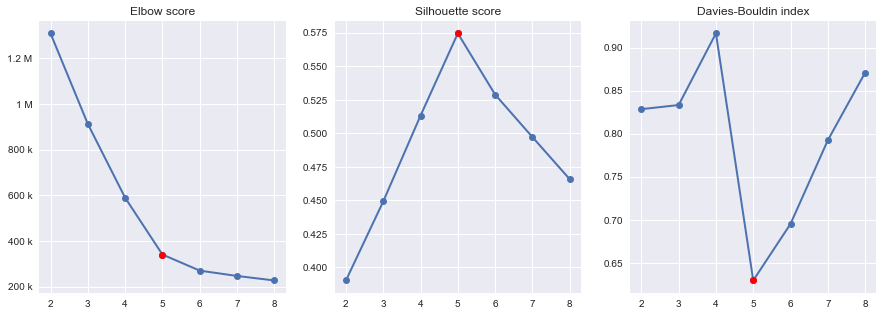

In [565]:
from matplotlib.ticker import EngFormatter

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each metric data with corresponding critical point
for i, metric_data in zip(list(range(len(ax))), [avg_sse, avg_sil, avg_dav]):
    ax[i].plot(n_clusters, metric_data, linewidth=2, marker='o')
    plt.sca(ax[i])
    plt.plot(5, metric_data[3], '-ro')
    plt.xticks(np.linspace(2, 8, 7))

# Format Elbow score y-axis
ax[0].yaxis.set_major_formatter(EngFormatter())

ax[0].set_title('Elbow score')
ax[1].set_title('Silhouette score')
ax[2].set_title('Davies-Bouldin index')
    
plt.show()

In [566]:
# Optimal Kmeans 
kmeans = KMeans(n_clusters=5, init= 'random', n_init= 10, max_iter= 300)
kmeans_labels = kmeans.fit_predict(principal_components)

#Merging PCs kept with the predicted cluster labels
kmeans_clustering = pd.concat([principal_components, pd.Series(kmeans_labels)], axis=1)
kmeans_clustering.rename(columns={0: "labels"}, inplace= True)
kmeans_clustering.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,labels
0,-20.536573,-39.605085,27.026740,7.519038,-1.253594,1
1,-1.703527,35.554901,-2.252613,19.662346,-21.237761,3
2,-26.944853,2.995044,30.175370,-31.260508,-39.540452,1
3,-29.924360,-27.954171,28.644093,-10.136862,-18.015003,1
4,-27.296967,-4.393025,-21.940561,-19.092111,2.463744,0


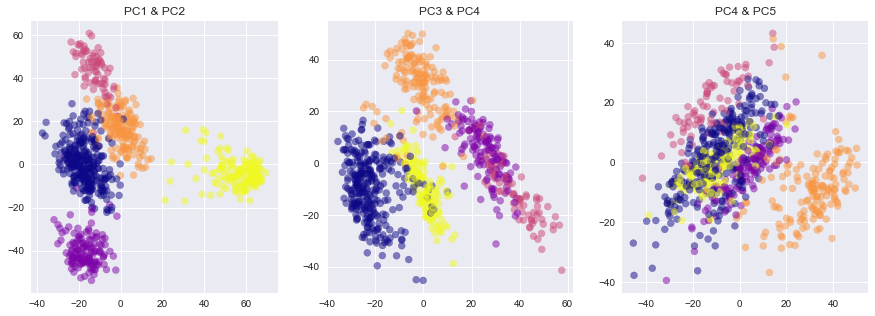

In [567]:
# Visualizing optimal clusters for Kmeans
# Plot three first pairs of principal components
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax1.scatter(principal_components.iloc[:, 0], principal_components.iloc[:, 1], alpha= 0.5, c=kmeans_clustering.labels, cmap='plasma')
ax2.scatter(principal_components.iloc[:, 2], principal_components.iloc[:, 3], alpha= 0.5, c=kmeans_clustering.labels, cmap='plasma')
ax3.scatter(principal_components.iloc[:, 3], principal_components.iloc[:, 4], alpha= 0.5, c=kmeans_clustering.labels, cmap='plasma')
ax1.set_title('PC1 & PC2')
ax2.set_title('PC3 & PC4')
ax3.set_title('PC4 & PC5')
plt.show()

In [568]:
# Gaussian Mixture model internal indicies evaluation
from sklearn.mixture import GaussianMixture

n_components = [2,3,4,5,6,7,8]

# averaging results over 10 runs
avg_bic_dict = dict((n,0) for n in n_clusters)
avg_bic = []
avg_sil_dict = dict((n,0) for n in n_clusters)
avg_sil = []
avg_dav_dict = dict((n,0) for n in n_clusters)
avg_dav = []

for i in range(0,10):
    for n in n_components:
        gmm = GaussianMixture(n_components=n, init_params='random', n_init=10, max_iter=300)
        gmm_labels = gmm.fit_predict(principal_components)

        avg_bic_dict[n] += gmm.bic(principal_components)
        sil_score = silhouette_score(principal_components, gmm_labels)
        avg_sil_dict[n] += sil_score
        db_score = davies_bouldin_score(principal_components, gmm_labels)
        avg_dav_dict[n] += db_score

for n in n_components:
    avg_bic.append(avg_bic_dict[n]/10)
    avg_sil.append(avg_sil_dict[n]/10)
    avg_dav.append(avg_dav_dict[n]/10)

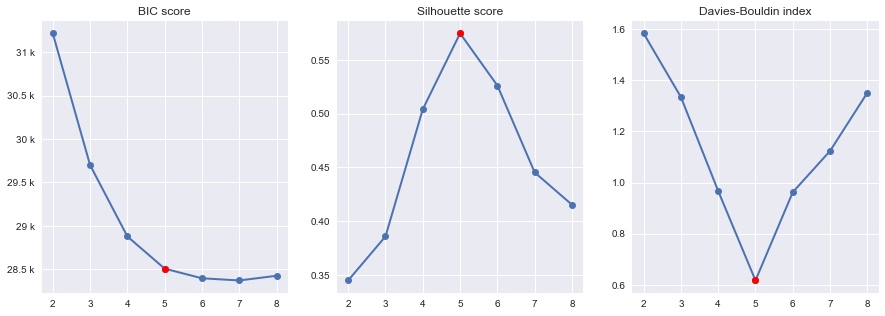

In [569]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Highlight critical points and set xticks
for i, metric_data in zip(list(range(len(ax))), [avg_bic, avg_sil, avg_dav]):
    ax[i].plot(n_components, metric_data, linewidth=2, marker='o')
    # Highlight critical data 
    plt.sca(ax[i])
    plt.plot(5, metric_data[3], '-ro')
    plt.xticks(np.linspace(2, 8, 7))

# Format BIC score y-axis
ax[0].yaxis.set_major_formatter(EngFormatter())    

ax[0].set_title('BIC score')
ax[1].set_title('Silhouette score')
ax[2].set_title('Davies-Bouldin index')

plt.show()

In [570]:
# Optimal GMM 
gmm = GaussianMixture(n_components=5, init_params='random', n_init=10, max_iter=300)
gmm_labels = gmm.fit_predict(principal_components)

#Merging PCs kept with the predicted cluster labels
gmm_clustering = pd.concat([principal_components, pd.Series(gmm_labels)], axis=1)
gmm_clustering.rename(columns={0: "labels"}, inplace= True)
gmm_clustering.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,labels
0,-20.536573,-39.605085,27.026740,7.519038,-1.253594,2
1,-1.703527,35.554901,-2.252613,19.662346,-21.237761,1
2,-26.944853,2.995044,30.175370,-31.260508,-39.540452,2
3,-29.924360,-27.954171,28.644093,-10.136862,-18.015003,2
4,-27.296967,-4.393025,-21.940561,-19.092111,2.463744,4


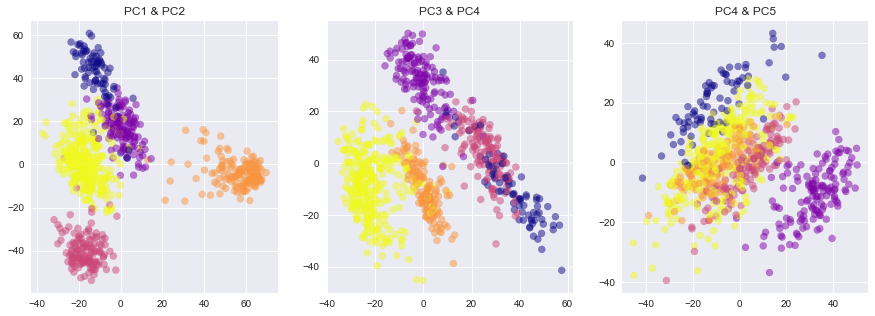

In [571]:
# Plot three first pairs of principal components
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax1.scatter(principal_components.iloc[:, 0], principal_components.iloc[:, 1], alpha= 0.5, c=gmm_clustering.labels, cmap='plasma')
ax2.scatter(principal_components.iloc[:, 2], principal_components.iloc[:, 3], alpha= 0.5, c=gmm_clustering.labels, cmap='plasma')
ax3.scatter(principal_components.iloc[:, 3], principal_components.iloc[:, 4], alpha= 0.5, c=gmm_clustering.labels, cmap='plasma')
ax1.set_title('PC1 & PC2')
ax2.set_title('PC3 & PC4')
ax3.set_title('PC4 & PC5')
plt.show()

# Question 2 - Consensus Clustering

### Task 5

* Perform consensus clustering on the gene dataset from Question 1. Use the pre-processed and dimension reduced version of the data you used in Task 4.
* Compute the empirical CDF for each consensus matrix and plot them. Compare the results for different cluster counts K
* Compute the PAC score for each cluster count and rank them.
* Use these measures of cluster stability to argue for reasonable selections of cluster count. Do these results agree with your results from Task 4?

In [572]:
# Consensus clustering
import random
import math
import time

start = time.time()

# Total number of samples (not just sub-sample)
n = principal_components.shape[0]  
n_clusters = [2, 3, 4, 5, 6, 7, 8]
M = 100

consensus_matrices = []

for k in n_clusters:

    # Initializing connectivity and indicator matrices to all zeros of size nxn 
    conn_sum = np.zeros((n,n))
    ind_sum = np.zeros((n,n))

    for i in range (M):

        # Generating sample size
        sample_size = math.floor(0.8 * n)

        # Sub-sample indices
        sub_sample_indices = random.sample(range(n), sample_size)

        # Create sub-sample withouth replacement
        sub_sample = principal_components.iloc[sub_sample_indices]

        # Create, fit, and predict new K-Means model
        kmeans = KMeans(n_clusters=k, init= 'random', n_init= 10, max_iter= 300)
        kmeans_labels = kmeans.fit_predict(sub_sample)

        # Update aggregated indicator matrix
        for i in sub_sample_indices:
            for j in sub_sample_indices:
                ind_sum[i][j] += 1.0

        # Update aggregated connectivity matrix
        for i in range(sample_size):
            for j in range(sample_size):
                if kmeans_labels[i] == kmeans_labels[j]:
                    conn_sum[sub_sample_indices[i]][sub_sample_indices[j]] += 1.0

    # Get and store consensus matrix
    consensus_matrix = conn_sum / ind_sum 
    consensus_flattened = consensus_matrix.flatten()

    consensus_matrices.append(consensus_flattened)

print(time.time()-start)

268.35252690315247


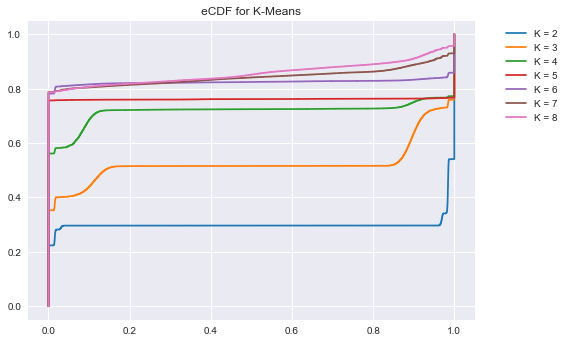

In [573]:
from statsmodels.distributions.empirical_distribution import ECDF

# Values for PAC score
q1 = 0.01
q2 = 0.99

pac_scores = []

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Get and plot eCDF data 
for index, matrix in enumerate(consensus_matrices):
    ecdf = ECDF(matrix)
    pac = ecdf(q2) - ecdf(q1)
    pac_scores.append(pac)
    plt.plot(ecdf.x, ecdf.y, color=colors[index], label=f'K = {index+2}')

# Plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('eCDF for K-Means')
plt.show()

/Users/sara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Number of clusters'), Text(0, 0.5, 'PAC')]

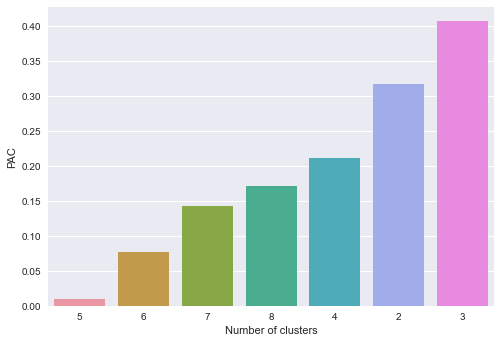

In [574]:
import seaborn as sns

# Sorting PAC-scores
temp_pac = pd.DataFrame({'cluster': n_clusters, 'PAC': pac_scores}, columns = ['cluster', 'PAC'], index = None)
ranked_pac = temp_pac.sort_values(['PAC'])

#  Plotting PAC-values

ax = sns.barplot(ranked_pac['cluster'], ranked_pac['PAC'], order = ranked_pac['cluster'])
ax.set(xlabel='Number of clusters', ylabel='PAC')